<a href="https://colab.research.google.com/github/maitri2905/overfitting/blob/main/Patel_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **What is Overfitting:**

When a model fits more data than it needs, it starts catching noisy data and inaccurate values in the data. As a result, the efficiency and the accuracy of the model decrease.

When we run the training algorithm on the data set, we allow the cost to reduce with each number of iteration so running this algorithm for too long will result in reduced cost but it will also fit the noisy data from the data set.

The result will look like the graph below: 
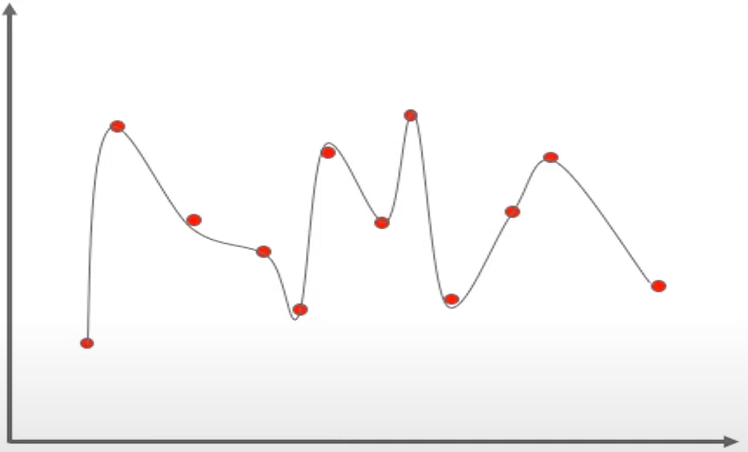

## **Underfitting:**

To avoid overfitting, we could stop the training at an initial stage. But t might also lead to the model not being able to learn enough from the training data, which may find it difficult to capture the dominant trend. This is known as Underfitting.

The result is the same as overfitting like it will cause inefficiency in predicting the outcomes, but it will take fewer data to recognize the dominant trend inside the data set.

The graph will look like below:


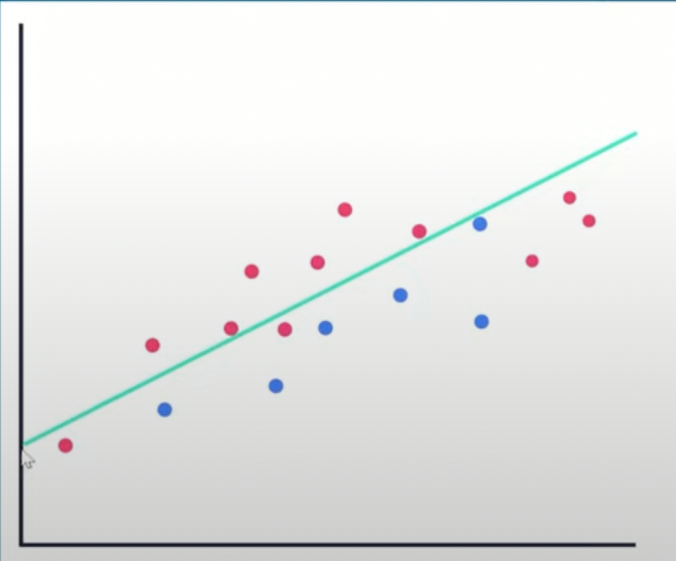

### OVERFITTING using Higher Order Linear Regression

Import the Libraries

In [ ]:
import operator
from math import *
import random
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Generate 20 random values

In [ ]:
X=[]
Y=[]
data =[]
mu, sigma = 0,1
for i in range(20):
    X1 = random.uniform(0,1)    
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + N * 0.1
    X = np.append(X,X1)
    Y = np.append(Y,Y1)
data = np.column_stack((X,Y)) 
print(data)

[[ 8.34843144e-01 -8.32649706e-01]
 [ 8.41711791e-01 -6.70664641e-01]
 [ 1.85857207e-02  7.02569862e-02]
 [ 6.39267961e-01 -7.33213741e-01]
 [ 8.02589030e-04  6.24502822e-02]
 [ 4.90229457e-01  1.07625625e-01]
 [ 3.65081017e-02  5.27728398e-02]
 [ 9.83563085e-01 -1.06984881e-01]
 [ 6.73506636e-01 -7.62182461e-01]
 [ 7.96008097e-01 -9.12362189e-01]
 [ 5.25890923e-01 -3.20178291e-01]
 [ 2.55741197e-01  1.04122003e+00]
 [ 3.25487648e-01  1.00120356e+00]
 [ 9.62039045e-01 -1.27586536e-02]
 [ 9.84737004e-01 -3.99526734e-04]
 [ 4.58967504e-01  5.41259530e-01]
 [ 4.95046091e-01 -5.11465631e-02]
 [ 3.45940415e-01  8.02872984e-01]
 [ 9.01296606e-01 -5.65100970e-01]
 [ 4.92690498e-01  1.92709920e-02]]


Splitting the data into two equal parts: train and test both having 10 pairs

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.5)

In [ ]:
print(X_train)

[[ 8.41711791e-01 -6.70664641e-01]
 [ 1.85857207e-02  7.02569862e-02]
 [ 6.39267961e-01 -7.33213741e-01]
 [ 8.34843144e-01 -8.32649706e-01]
 [ 8.02589030e-04  6.24502822e-02]
 [ 4.92690498e-01  1.92709920e-02]
 [ 9.84737004e-01 -3.99526734e-04]
 [ 2.55741197e-01  1.04122003e+00]
 [ 7.96008097e-01 -9.12362189e-01]
 [ 9.83563085e-01 -1.06984881e-01]]


Reshape the data(Reshaping is used to make an array column-wise)

In [ ]:
X_train = X_train[:,0].reshape(-1,1) 
print(X_train)

[[8.41711791e-01]
 [1.85857207e-02]
 [6.39267961e-01]
 [8.34843144e-01]
 [8.02589030e-04]
 [4.92690498e-01]
 [9.84737004e-01]
 [2.55741197e-01]
 [7.96008097e-01]
 [9.83563085e-01]]


In [ ]:
print(X_test)

[[ 0.49022946  0.10762563]
 [ 0.32548765  1.00120356]
 [ 0.4589675   0.54125953]
 [ 0.34594041  0.80287298]
 [ 0.52589092 -0.32017829]
 [ 0.67350664 -0.76218246]
 [ 0.0365081   0.05277284]
 [ 0.90129661 -0.56510097]
 [ 0.96203904 -0.01275865]
 [ 0.49504609 -0.05114656]]


In [ ]:
X_test = X_test[:,0].reshape(-1,1)
print(X_test)

[[0.49022946]
 [0.32548765]
 [0.4589675 ]
 [0.34594041]
 [0.52589092]
 [0.67350664]
 [0.0365081 ]
 [0.90129661]
 [0.96203904]
 [0.49504609]]


In [ ]:
Y_train = Y_train.reshape(-1,1)
print(Y_train)

[[-6.70664641e-01]
 [ 7.02569862e-02]
 [-7.33213741e-01]
 [-8.32649706e-01]
 [ 6.24502822e-02]
 [ 1.92709920e-02]
 [-3.99526734e-04]
 [ 1.04122003e+00]
 [-9.12362189e-01]
 [-1.06984881e-01]]


In [ ]:
Y_test = Y_test.reshape(-1,1)
print(Y_test)

[[ 0.10762563]
 [ 1.00120356]
 [ 0.54125953]
 [ 0.80287298]
 [-0.32017829]
 [-0.76218246]
 [ 0.05277284]
 [-0.56510097]
 [-0.01275865]
 [-0.05114656]]


Importing more dependencies 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import math

Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9

In [ ]:
#np.polyfit is used to print and calculate weights of polynomial regression
print("Weights of polynomial regression for order 0: \n", np.polyfit(X_train[:,0],Y_train[:,0],0).reshape(-1,1))
print("\nWeights of polynomial regression for order 1: \n", np.polyfit(X_train[:,0],Y_train[:,0],1).reshape(-1,1))
print("\nWeights of polynomial regression for order 3: \n", np.polyfit(X_train[:,0],Y_train[:,0],3).reshape(-1,1))
print("\nWeights of polynomial regression for order 9: \n", np.polyfit(X_train[:,0],Y_train[:,0],9).reshape(-1,1))

Weights of polynomial regression for order 0: 
 [[-0.20630764]]

Weights of polynomial regression for order 1: 
 [[-0.8454135 ]
 [ 0.28808604]]

Weights of polynomial regression for order 3: 
 [[ 2.04823898e+01]
 [-3.05474709e+01]
 [ 1.02187545e+01]
 [-1.06346017e-02]]

Weights of polynomial regression for order 9: 
 [[ 9.58482590e+05]
 [-4.77315294e+06]
 [ 9.99964417e+06]
 [-1.13994412e+07]
 [ 7.62009783e+06]
 [-2.98297556e+06]
 [ 6.35992540e+05]
 [-5.95890983e+04]
 [ 9.45274843e+02]
 [-6.58160235e-01]]


Display weights in table

In [ ]:
table = {'M=0': np.polyfit(X_train[:,0],Y_train[:,0],0), 
         'M=1': np.polyfit(X_train[:,0],Y_train[:,0],1),
         'M=6': np.polyfit(X_train[:,0],Y_train[:,0],6),
         'M=9': np.polyfit(X_train[:,0],Y_train[:,0],9),
        }
pd.DataFrame({ key:pd.Series(value) for key, value in table.items() })

,M=0,M=1,M=6,M=9
0,-0.206308,-0.845413,83.329072,9.584826e+05
1,NaN,0.288086,-327.908169,-4.773153e+06
2,NaN,NaN,477.068946,9.999644e+06
3,NaN,NaN,-297.414448,-1.139944e+07
4,NaN,NaN,64.892326,7.620098e+06
5,NaN,NaN,0.021527,-2.982976e+06
6,NaN,NaN,0.056495,6.359925e+05
7,NaN,NaN,NaN,-5.958910e+04
8,NaN,NaN,NaN,9.452748e+02
9,NaN,NaN,NaN,-6.581602e-01


Draw a chart of fit data

sorted X and Y data simultaneously to get proper line graph ouput

Chart for degree = 0


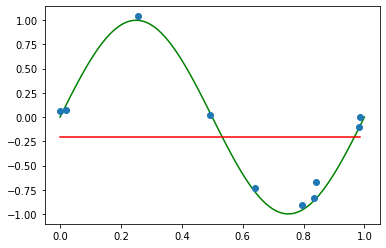

------------------------------------------------------------
Chart for degree = 1


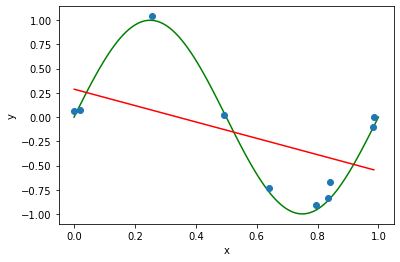

------------------------------------------------------------
Chart for degree = 2


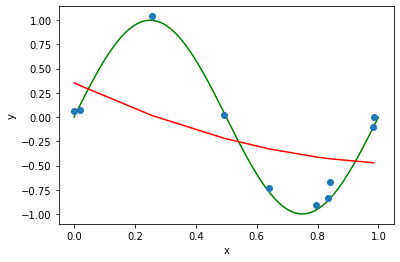

------------------------------------------------------------
Chart for degree = 3


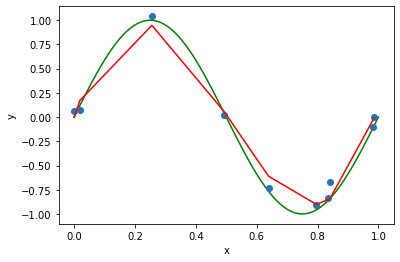

------------------------------------------------------------
Chart for degree = 4


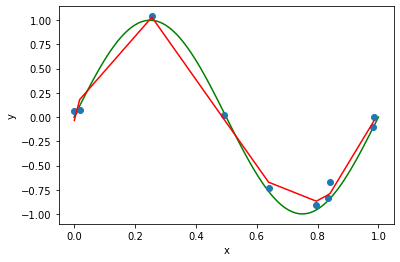

------------------------------------------------------------
Chart for degree = 5


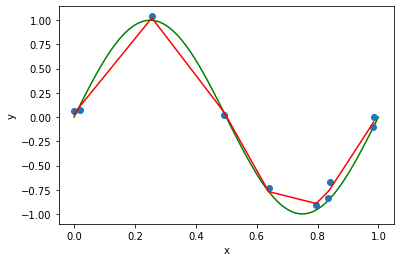

------------------------------------------------------------
Chart for degree = 6


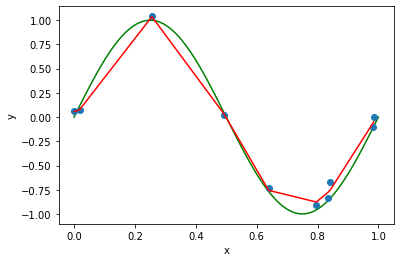

------------------------------------------------------------
Chart for degree = 7


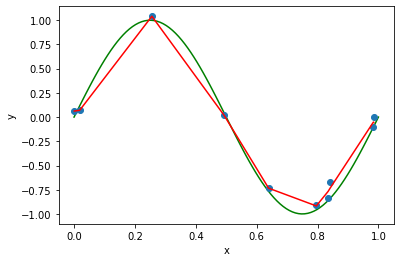

------------------------------------------------------------
Chart for degree = 8


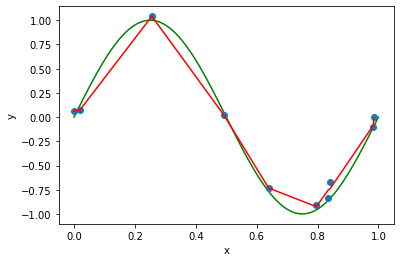

------------------------------------------------------------
Chart for degree = 9


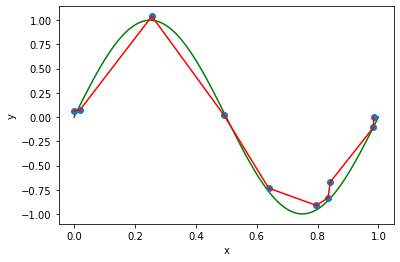

------------------------------------------------------------


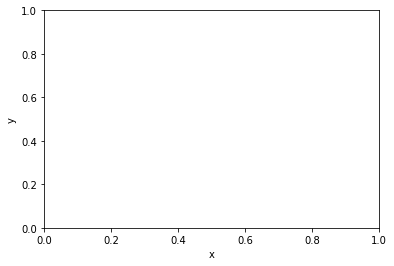

In [ ]:
 X_train, Y_train = zip(*sorted(zip(X_train, Y_train)))
for i in range(10):
    print('Chart for degree = %d' %(i))
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x)
    plt.plot(x,y,color='g') 
    
    #furthur we will generate polynomial features for given degrees (0 - 9)
    poly_features=PolynomialFeatures(degree=i)
    #fits training data for given degree and transform it to X_poly
    X_poly=poly_features.fit_transform(X_train)
    
    model=LinearRegression()
    #fit linear regression model for given X and Y data
    model.fit(X_poly,Y_train) 
    plt.plot(X_train,Y_train,'o')
    plt.plot(X_train,model.predict(X_poly), color='r')
    plt.show()
    plt.xlabel('x') 
    plt.ylabel('y') 
    print("-"*60)

Calculate train error vs test error

In [ ]:
rmse_train=[]
rmse_test=[]

#i used for loop to get 
for i in range(10):
    poly_features = PolynomialFeatures(degree=i)
    X_poly=poly_features.fit_transform(X_train)
    model=LinearRegression()
    model.fit(X_poly,Y_train) 
    rmse = sqrt(mean_squared_error(Y_train, model.predict(poly_features.fit_transform(X_train))))
    rmse_train.append(rmse)
    
    X_poly=poly_features.fit_transform(X_test)
    rmset = sqrt(mean_squared_error(Y_test, model.predict(poly_features.fit_transform(X_test))))
    rmse_test.append(rmset)

In [ ]:
print(rmse_train)

[0.5650015811863514, 0.4777114887512722, 0.4739771206051546, 0.08647256820307271, 0.06947595919003476, 0.04449203748453502, 0.04131771368587838, 0.03754289191794553, 0.034261927593845276, 8.990428953145987e-10]


In [ ]:
print(rmse_test)

[0.6093680697889153, 0.516847267651252, 0.5507622168708854, 0.1813159033271579, 0.19051351485329354, 0.135304437381633, 0.1295144148015309, 0.1486744508166371, 0.6470764523601951, 17.268775253801586]


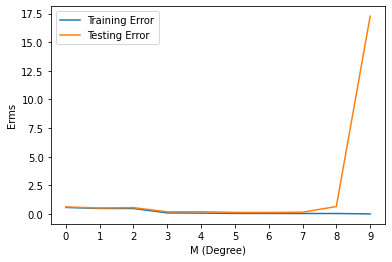

In [ ]:
degree = ['0','1','2','3','4','5','6','7','8','9']

#fig method to use egend method and plot the chart
fig,ax = plt.subplots()
ax.plot(degree, rmse_train, label = 'Training Error')
ax.plot(degree, rmse_test, label = 'Testing Error')
leg = ax.legend()
plt.xlabel('M (Degree)')
plt.ylabel('Erms')
plt.show()

Now generate 100 more data and fit 9th order model and draw fit

In [ ]:
mu,sigma = 0,1
X = []
Y = []
for i in range(100):
    X1 = random.uniform(0,1)
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + N * 0.1
    X = np.append(X,X1)
    Y = np.append(Y,Y1)
new_data = np.column_stack((X,Y))

In [ ]:
X = new_data[:,0].reshape(-1,1)
Y = new_data[:,1].reshape(-1,1)

In [ ]:
X,Y = zip(*sorted(zip(X, Y)))

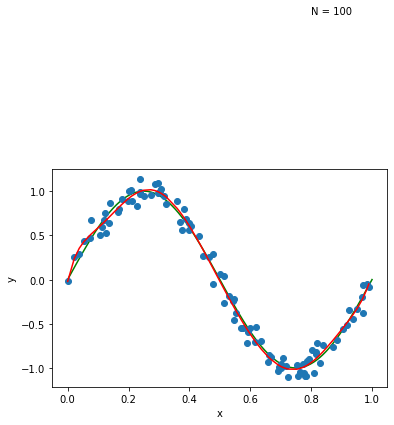

In [ ]:
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x)  
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X)
model=LinearRegression()
model.fit(X_poly,Y) 
plt.plot(X,Y,'o')
plt.plot(X,model.predict(X_poly), color='r') #predicting Y value from X value and then plot it

plt.text(0.8, 3,'N = 100')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Selected 25 data and fit 9th order model and draw fit

In [ ]:
X25 = new_data[:25,0].reshape(-1,1)
Y25 = new_data[:25,1].reshape(-1,1)
X25,Y25 = zip(*sorted(zip(X25, Y25)))

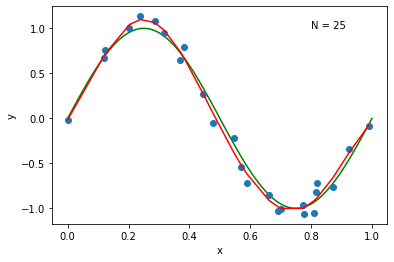

In [ ]:
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x)  
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X25)
model=LinearRegression()

model.fit(X_poly,Y25) 
plt.plot(X25,Y25,'o')
plt.plot(X25,model.predict(X_poly), color='r')

plt.text(0.8,1,'N = 25')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Using Regularization method, we can prevent overfitting

Now we will regularize using the sum of weights.



In [ ]:
lamda = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
train_error_lamda = []
test_error_lamda = []

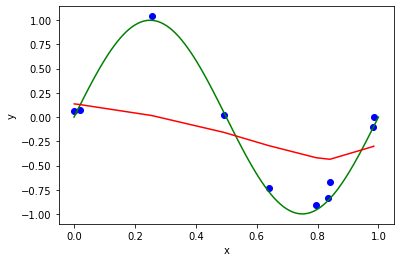

------------------------------------------------------------


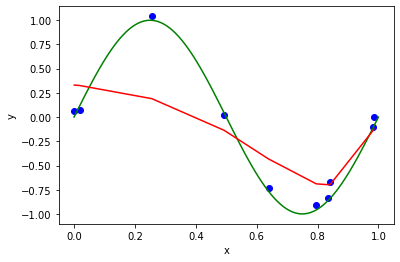

------------------------------------------------------------


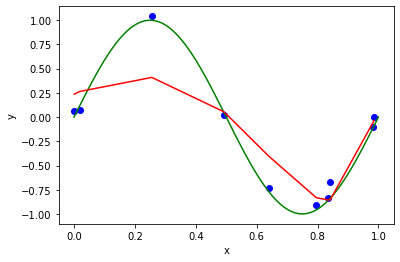

------------------------------------------------------------


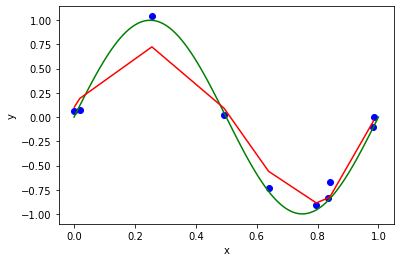

------------------------------------------------------------


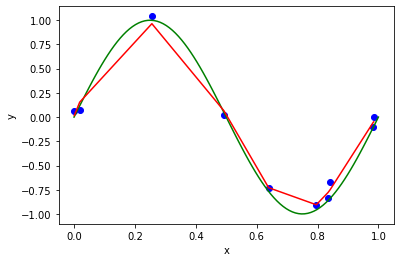

------------------------------------------------------------


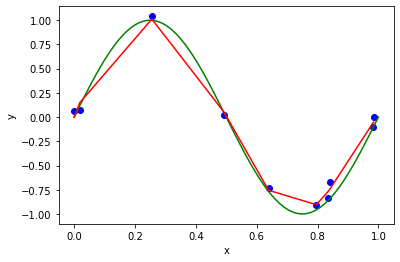

------------------------------------------------------------


In [ ]:
for i in lamda:
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x)
    plt.plot(x,y,color='g')
    
    poly_features = PolynomialFeatures(9)
    X_poly = poly_features.fit_transform(X_train)
    poly_features.fit(X_poly,Y_train) 
    reg = linear_model.Ridge(alpha = i) #taking lamda values in alpha and then fit ridge model
    reg.fit(X_poly, Y_train)
    
    Y_pred = reg.predict(poly_features.fit_transform(X_train)) #predict values of Y from X
    
    plt.scatter(X_train, Y_train, color = 'blue')
    plt.plot(X_train, Y_pred, color = 'red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    print("-"*60)
    
    #taking two arrays and store both training and testing errors in it
    rmse = sqrt(mean_squared_error(Y_train, reg.predict(poly_features.fit_transform(X_train))))
    train_error_lamda.append(rmse)
    rmse = sqrt(mean_squared_error(Y_test, reg.predict(poly_features.fit_transform(X_test))))
    test_error_lamda.append(rmse)

In [ ]:
print(train_error_lamda)

[0.43244950642773183, 0.3256460911021651, 0.24954768941958433, 0.1339532591977612, 0.05628869893010708, 0.051707906242474656]


In [ ]:
print(test_error_lamda)

[0.5149517769320815, 0.44430863918250946, 0.3317291060243291, 0.20990215732994189, 0.15559437982902893, 0.15339425843141594]


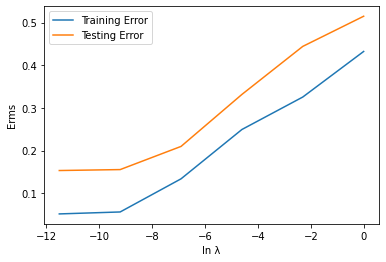

In [ ]:
fig,ax = plt.subplots()
ax.plot(np.log(lamda),train_error_lamda, label="Training Error")
ax.plot(np.log(lamda),test_error_lamda, label="Testing Error")
leg = ax.legend()
plt.xlabel('ln λ')
plt.ylabel('Erms')
plt.show()




### From the given test model and degrees(0, 1, 3, 9), 

### I can concude that the model gives best performance for Degree 3

## References

https://laptrinhx.com/what-is-overfitting-in-machine-learning-and-how-to-avoid-it-1333335641/

https://www.datasciencecentral.com/profiles/blogs/deep-dive-into-polynomial-regression-and-overfitting

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

https://statisticsbyjim.com/regression/overfitting-regression-models/

https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

https://www.datacamp.com/community/tutorials/towards-preventing-overfitting-regularization

https://elitedatascience.com/overfitting-in-machine-learning

https://blogs.sas.com/content/subconsciousmusings/2017/07/06/how-to-use-regularization-to-prevent-model-overfitting/

https://www.analyticsvidhya.com/blog/2015/02/avoid-over-fitting-regularization/

https://analyticsindiamag.com/types-of-regularization-techniques-to-avoid-overfitting-in-learning-models/

